# Section 1: Introduction to SCIKIT-LEARN
For the development of the solutions to the ML problems we will face
along the way, we will make use of the scikit library. Why? Scikit-learn 
(Sklearn) is the most useful and robust library for machine learning in Python. 
It provides a selection of efficient tools for machine learning and statistical 
modeling including classification, regression, clustering and dimensionality
reduction via a consistence interface in Python.
***

In [2]:
"""
The first example we will look into is from the MNIST dataset.
It consists of handwritten digits.
"""

from sklearn.datasets import load_digits
digits = load_digits()


(1797, 8, 8)

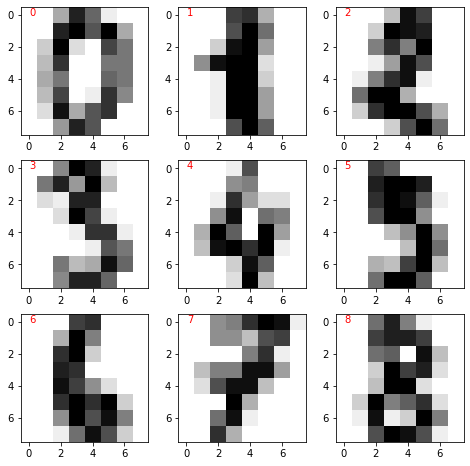

In [13]:
# We check the dataset
digits.images.shape
# We have 1797 images of 8x8 shape

# Lets visualize some images

import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(8,8))
for i, ax in enumerate(axes.flat):
  ax.imshow(digits.images[i],cmap ='binary')
  ax.text(0.05, 0.05, str(digits.target[i]), color = 'red')

In [15]:
# Now we divide the data into train and outcome.
X_train = digits.data
y_train = digits.target

# Check the sizes
print(X_train.shape, y_train.shape)

(1797, 64) (1797,)


In [16]:
# Perform dimensionality reduction
# instead of a 8x8 (64) dim. representation, we try
# to reduce to 2 dimensions.

# One possible approach is to use Manifold Learning,
# Isomap from scikit, and reduce dimensions

from sklearn.manifold import Isomap
isomap_reduce = Isomap(n_components = 2) # Here we specified # of dimensions
isomap_reduce.fit(X_train) # train the model on the train data
transformed_x = isomap_reduce.transform(X_train)

# Check if we reduced dimensions properly
transformed_x.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:304: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

In [19]:
# Extra, try to use K-Nearest Neighbor to cluster the data

from sklearn.manifold import Isomap
isomap_knn = Isomap(n_neighbors = 3) # Try 3-KNN
isomap_knn.fit(X_train)
transformed_knn = isomap_knn.transform(X_train)

# check the shape of the transformed data
transformed_knn.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:304: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

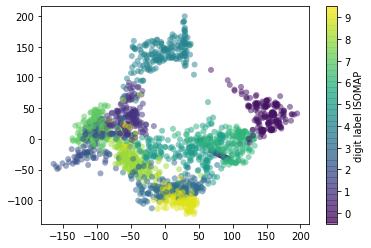

In [23]:
# We can try to visualize the clustering of the whole train dataset
plt.scatter(transformed_x[:, 0], transformed_x[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5)
plt.colorbar(label='digit label ISOMAP', ticks=range(10))
plt.clim(-0.5, 9.5);

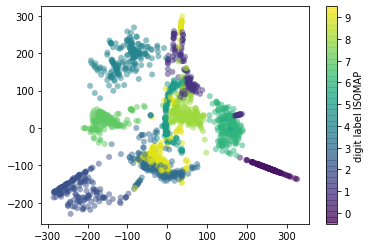

In [24]:
# Check the clustering of 3NN
plt.scatter(transformed_knn[:, 0], transformed_knn[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5)
plt.colorbar(label='digit label 3NN', ticks=range(10))
plt.clim(-0.5, 9.5);

In [25]:
# Based on the graphs, we can see that the data is clustered differently.
# We can check the accuracies of the model on each transformed dataset, 
# and respective accuracies.
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_train, y_train, random_state=0)

In [26]:
# Use Gaussian Naive Bayes to fit the data

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [32]:
# Logistic Regression performed better than GaussianNB

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9511111111111111

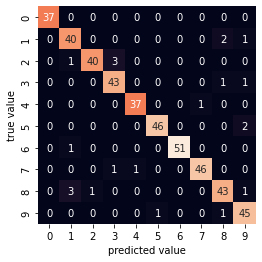

In [34]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

# Section 2: Feature Engineering

When dealing with categorical data, one approach is to convert it into integers, say *City A -> 1 ; City B ->2, ...* This is not preferred. To perform this, we can rely on One-Hot encoding. It effectively creates
extra columns indicating the presence or absence of a category with a value of 1 or 0,
respectively.


```
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)
```

To see the meaning of each column, you can inspect the feature names:
vec.get_feature_names()

There is one clear disadvantage of this approach: if your category has many possible
values, this can greatly increase the size of your dataset.

However, because the enco‐
ded data contains mostly zeros, a sparse output can be a very efficient solution:
**`vec = DictVectorizer(sparse=True, dtype=int)`**

Handling of missing data in Feature Engineering is called **imputation of missing data**. For a baseline imputation approach, using the mean, median, or most frequent value, Scikit-Learn provides the Imputer class:


```
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean')
X2 = imp.fit_transform(X)
```

To sum up, it can get tedious to do the transformation of data by hand, so we can rely on Feature Pipelining to handle it more efficiently. For example,
we might want a processing pipeline that looks something like this:
1. Impute missing values using the mean
2. Transform features to quadratic
3. Fit a linear regression


```
from sklearn.pipeline import make_pipeline
model = make_pipeline(Imputer(strategy='mean'),
PolynomialFeatures(degree=2),
LinearRegression())
```

All the steps of the model are applied automatically.

